In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
import scipy as sc
from scipy import linalg
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt
from matplotlib import animation,rc
from IPython.display import HTML;

Partiendo de la ecuación que es solución del oscilador armónico simple, la cual es $\Psi (t)=A_{n}\cos(wt+\phi)$ y tomando las amplitudes $A_{n}=B\sin(n\theta)+C\cos(n\theta)$, aplicando contorno llegamos a la relación $A^{(p)}_{n}=B^{(p)} \sin \left(\frac{p\pi}{(N+1)}n \right )$ que representa el primer caso de ambos extremos fijos. Aqui las condiciones de contorno van a estar dadas por la masa $n=0$ y $n=N+1$.
Llegamos a la relación de $\theta^{(p)}=\frac{p \pi}{N+1}$ y $C=0$ , lo único que cambiaría en una matriz son las masas $n=1$ y $n=N$ lo cual representa que la primera y ultima ecuación de la matriz no seran iguales a las demás.
La ecuación dada es$\frac{\partial^2{\Psi} }{\partial x^2}=   \frac{1}{h^{2}}      {(\Psi_{n+1}-2\Psi_{n}+\Psi _{n-1})}$ que es similar a la ecuación de ondas clásica y el factor h es el que en cierta parte hace un paso del continuo al discreto. Entonces usando la fórmula de las amplitudes y despejando las $A_{n}$ en la ecuación dada en el item llego a una relación de dispersión que contiene toda esta información que es: $\omega^2=\frac{T_{0}}{\rho h^2}\left ( \frac{A_{n+1}-2A_{n}+A_{n-1}}{A_{n}} \right )$ que se puede simplificar llegando a   $\omega_{p}=2 \sqrt{\frac{T_{0}}{\rho h^2}}\left |{\sin(\frac{\theta_{p}}{2})}\right |$ con p número natural, y cumple que la cantidad de masas $N=p$ (cantidad de modos), por lo que si $p=\infty$ y realizando los límites correspondientes, se llegaría al ejemplo de la cuerda.
Aquí,$\theta$ representa en cierta parte una frecuencia espacial, y esta relacionado por la $k$ visto en la práctica por $\theta^{(p)}=k^{(p)}h$, donde $h$ es la separación de las masas, y que en un límite se tiene que $x=hn$.

La ecuación general para ambos extremos fijos queda entonces $\Psi_{n}^{p} (t)=B^{(p)} \sin(\theta^{(p)} n)\cos(w^{(p)}t+\phi^{(p)})$.
A continuación se mostrará un ejemplo matricial con n=6

In [ ]:
L=7           #Largo de la cuerda (N*h)
N=6           #Número de masas
T0=1          #Tensión de la cuerda
R=1           #Densidad de la cuerda
h=L/(N+1)     #Posición relativa que relaciona una porción de una cuerda con una masa
x=T0/(R*((h)**2))  #Para simplificar llamo a otra variable
a = np.zeros(N)          #### OTRA FORMA DE REALIZAR MATRICES (VER)
B1 = np.array([[2*x,-x,0,0,0,0],
              [-x,2*x,-x,0,0,0],
              [0,-x,2*x,-x,0,0],
              [0,0,-x,2*x,-x,0],
              [0,0,0,-x,2*x,-x],
              [0,0,0,0,-x,2*x]])

print(B1)              #Matriz
print()
omega1,v1 = np.linalg.eig(B1)
print(np.sort(omega1))         #Autovalores (elevado al cuadrado)
print()
print(np.sort(v1))             #Autovectores asociado

[[ 2. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  2.]]

[0.19806226 0.7530204  1.55495813 2.44504187 3.2469796  3.80193774]

[[-0.52112089 -0.41790651 -0.23192061  0.23192061  0.41790651  0.52112089]
 [-0.52112089 -0.52112089 -0.41790651 -0.41790651  0.23192061  0.23192061]
 [-0.52112089 -0.41790651 -0.23192061  0.23192061  0.41790651  0.52112089]
 [-0.52112089 -0.52112089 -0.41790651 -0.41790651  0.23192061  0.23192061]
 [-0.52112089 -0.41790651 -0.23192061  0.23192061  0.41790651  0.52112089]
 [-0.23192061 -0.23192061  0.41790651  0.41790651  0.52112089  0.52112089]]


Para realizar una analogía pero esta vez, que el extremo derecho este libre, entonces voy a plantear que $\frac{\partial \Psi_{N+1} }{\partial x}=0$, lo cual llego a que $\theta^{(p)}=\frac{(2p-1) \pi}{2(N+1)}$ que en el caso puramente discreto, no es más que pedir que las amplitudes $A_{N}=A_{N+1}$, (pensando por ejemplo que N+1 tiene masa infinita) ,llego a la conclusión que las amplitudes van a depender de la ecuación $\sin((N+1)\theta)=\sin(N\theta)$.
Notar que en las dos matrices, las masas n=1 tienen la misma expresión, pero difieren en n=N

In [ ]:
a = np.zeros(N)
B2 = np.array([[2*x,-x,0,0,0,0],
              [-x,2*x,-x,0,0,0],
              [0,-x,2*x,-x,0,0],
              [0,0,-x,2*x,-x,0],
              [0,0,0,-x,2*x,-x],
              [0,0,0,0,-x,x]])
print(B2)      #Matriz
print()
omega2,v2 = np.linalg.eig(B2)
print(np.sort(omega2))         #Autovalores (elevados al cuadrado)
print()
print(np.sort(v2))             #Autovectores

[[ 2. -1.  0.  0.  0.  0.]
 [-1.  2. -1.  0.  0.  0.]
 [ 0. -1.  2. -1.  0.  0.]
 [ 0.  0. -1.  2. -1.  0.]
 [ 0.  0.  0. -1.  2. -1.]
 [ 0.  0.  0.  0. -1.  1.]]

[0.05811637 0.5029785  1.29079023 2.24107336 3.13612949 3.77091205]

[[-0.36783427  0.13274845  0.25778203  0.45650931  0.51865369  0.55065581]
 [-0.55065581 -0.51865369 -0.45650931 -0.13274845  0.25778203  0.36783427]
 [-0.51865369 -0.45650931 -0.25778203  0.13274845  0.36783427  0.55065581]
 [-0.55065581 -0.51865369 -0.13274845  0.25778203  0.36783427  0.45650931]
 [-0.55065581 -0.13274845  0.25778203  0.36783427  0.45650931  0.51865369]
 [-0.36783427 -0.13274845  0.25778203  0.45650931  0.51865369  0.55065581]]


Los números que aparecen debajo son los autovalores (elevados al cuadrado) asociados a la matriz dada,primero con extremos fijos, y segundo con extremos mixtos. Notar que son 6 por cada sistema, y estos autovalores representan las frecuencias naturales de oscilación donde cada uno sera "activado" si se cumple una relación de condiciones de posición y velocidad, las cuales estan dadas por los autovectores asociados.
Por otra parte, las frecuencias, al cumplir la relación $\omega_{p}=2 \sqrt{\frac{T_{0}}{\rho h^2}}\left |{\sin(\frac{\theta_{p}}{2})}\right |$ ,lo único que cambia es que a cada modo, la frecuencia estará multiplicada solo por el número de este, por lo cual estas son multiplos de la frecuencia fundamental $\omega_{p=1}$.

^^^^^

Respecto a la longitud de onda $\lambda$, esta cumple siguiente relación que es $\lambda_{p}=\frac{2 \pi}{k_{p}}=\frac{2L}{p}=\frac{2 \pi h}{\theta}$

Voy a suponer que $h=1$ y por supuesto suponiendo que la cuerda esta formada por 6 partes o masas las cuales ellas cumplen un movimiento armónico simple.
Para el caso de ambos extremos fijos tengo:



In [ ]:
for p in range(1,7):       #Wp1 son las frecuencias para ambos extremos fijos
    theta1=(p)*np.pi/7
    wp1=p*(np.sqrt( T0/R*(h)**2))*abs(np.sin(theta1/2))
    ldo1=p*np.pi*(np.sqrt(T0/R))/wp1
    print(ldo1)

14.118189231609799
7.240632386867575
5.0387233988818245
4.018247824547354
3.4869047816311984
3.2223845623202214


Para el caso de extremos mixtos, se cumple que las longitudes de onda  $\lambda_{p}$ (en orden con p creciente) son:

In [ ]:
for p in range(1,7):                         #Wp2 son las frecuencias para ambos mixtos
    theta2=(2*p-1)*np.pi/14
    wp2=p*(np.sqrt(T0/R*(h)**2))*abs(np.sin(theta2/2))
    ldo2=p*np.pi*(np.sqrt(T0/R))/wp2
    print(ldo2)

28.058834042067907
9.511934044478547
5.904893318023904
4.442882938158366
3.7102903831650065
3.3283696752684806


INCISO B:
Siguiendo la relación antes mencionada, dada por $\lambda_{p}=\frac{2 \pi}{k_{p}}=\frac{2L}{p}=\frac{2 \pi h}{\theta_p}=\frac{2L}{p}$ y teniendo en cuenta que $h=\frac{L}{N+1}$, por convención eligo $L=1$.

Por consiguiente, puedo suponer que $\displaystyle\lim_{N \to{}\infty}{} $$h=\displaystyle\lim_{N \to{}\infty}{} \frac{1}{N+1}=0$, por lo que estoy considerando un diferencial de cuerda muy pequeño.
Otra cosa que se nota tambien es que en el paso del continuo al discreto, los gráficos de la relación de dispersión no son los mismos, quiere decir que hay un rango de frecuencias que no seran comunes entre si.
En dicho paso al continuo, se puede notar que $2 \sqrt{\frac{T}{\rho}}\left |{\sin(\frac{\kappa h}{2})}\right |=\kappa \sqrt{\frac{T}{\rho}} $

Respecto a las frecuencias temporales, la relación de dispersión es la siguiente:

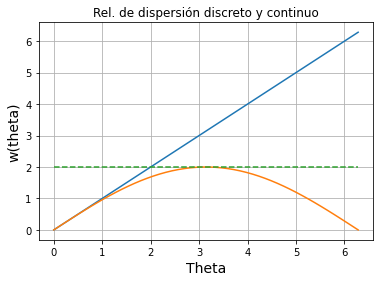

In [ ]:
theta=np.linspace(0,2*np.pi)
T0=1;R=1;h=1
Wmax=2*np.sqrt(T0/(R*(h)**2))
Wmaxx=0*theta+Wmax
Wrd1=Wmax*abs(np.sin(theta/2))
Wrd2=np.sqrt(T0/(R*(h)**2))*(theta/h)
plt.plot(theta,Wrd2)
plt.grid()
plt.title("Rel. de dispersión discreto y continuo");plt.xlabel("Theta",fontsize=14);plt.ylabel("w",fontsize=14);plt.plot(theta,Wrd1);plt.plot(theta,Wmaxx,"--");plt.show()

Por lo que viendo el gráfico de la relación de dispersión puedo notar que en el caso discreto, como era de esperable, la función tendrá unos valores de frecuencias acotados, y por ende en el continuo, la relación es una dispersión lineal.
A partir del gráfico, puedo notar que en el intervalo de interés (0,$\pi /2)$ la gráfica del seno se aproxima muy bien a la recta de pendiente 1.Esto en principio indicaria que para pocas masas se tiene que se es correcta la aproximación, esto mas precisamente si se tiene en cuenta la aproximación de masas tendiendo a infinito y que el seno sea igual a su argumento.
Por otra parte,teniendo en cuenta la fórmula $\lambda=\frac{2\pi c}{w}=\frac{2 \pi c}{2\sqrt[]{\frac{T_0}{\rho h^2 }\left |{\sin(\frac{\theta}{2})}\right |}}=\frac{\pi h}{\sin(\frac{\theta}{2})}$, puedo ver que $\lambda$ tomará valor mínimo si el seno es máximo, que quiere decir que $\theta=\pi, 3\pi,5 \pi,...,2(n-1)\pi$ con $n$ número natural.
Con estos valores dados entonces si se cumple la condición dada en el enunciado $\lambda_{min}=\pi h$ y se puede notar que los máximos estan acotados por $Wmax$ y si estos valores salieran de ese rango, entonces las frecuencias serian imaginarias.

En la condición de ambos extremos fijos, llego a que $p=m(N+1)$, mientras que en la de extremos mixtos llego a que $p=m(N+1)+\frac{1}{2}$ con $m$ número natural inpar.

Notar que si manejo algebraicamente la expresión con la que llegue a la relación de dispersión, tengo que $-2(\cos(\theta)-1)=\omega^2$ por lo que $Wmax^2=4$ que se da cuando $\cos(\theta)=-1$, con $\theta=\pi$


In [ ]:
N = 50
lambda_min = []  #Armo una lista con las longitudes de onda mínimas
for n in range(2,N+1):
  B = matriz_ef(n)          #Matriz B que recorre de 1 a 50 masas (extremos fijos)
  omega1_cuadrado, avec1 = sc.linalg.eig(B)       #Autovalores del sistema al cuadrado
  omega1= (np.sort(omega1_cuadrado))**(1/2)       #Tomo raiz de los autovalores
  lambda_1 = 2*pi*c/(omega1)                      #Longitud de onda
  lambda_min.append(lambda_1[-1])                 #Especifico que quiero el último valor de longitud de onda, que corresponde a la mayor frecuencia, por ende menor lambda
print(lambda_min)

[(3.627598728468436+0j), (3.4004353847414786+0j), (3.303265999194126+0j), (3.25241604281282+0j), (3.222384562320221+0j), (3.2031400922923634+0j), (3.1900567841598324+0j), (3.1807530011914555+0j), (3.173898362536886+0j), (3.168701332756517+0j), (3.1646666364740135+0j), (3.1614713216891066+0j), (3.1588974242004566+0j), (3.1567934770210755+0j), (3.1550515472705287+0j), (3.153593027153879+0j), (3.15235955971148+0j), (3.1513070816268796+0j), (3.150401816028187+0j), (3.1496175180473145+0j), (3.1489335444856423+0j), (3.1483334772350298+0j), (3.1478041259849685+0j), (3.1473347952648183+0j), (3.1469167386450767+0j), (3.146542747385776+0j), (3.146206836958376+0j), (3.1459040056950456+0j), (3.1456300471978924+0j), (3.1453814032414344+0j), (3.1451550474754355+0j), (3.1449483927701154+0j), (3.144759216864764+0j), (3.1445856023000642+0j), (3.1444258875813746+0j), (3.144278627235098+0j), (3.1441425589539485+0j), (3.1440165764287835+0j), (3.143899706768973+0j), (3.143791091646456+0j), (3.1436899714777

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


[]

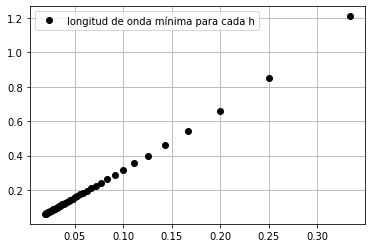

In [ ]:
def matriz_fijos(N):
  a = np.zeros(N)
  a[0] = 2
  a[1] = -1
  first_row = np.array(a)
  first_col = np.array(a)
  B = toeplitz(first_col, first_row)
  return B
N = 50
long_onda_min = [] #lista de lambdas minimos para cada N
lista_h = [] #lista de h para cada N
for n in range(2,N+1):
  B = matriz_fijos(n)
  mu_sq, autovectores = sc.linalg.eig(B)
  mu = (np.sort(mu_sq))**(1/2)
  h=1/(n+1)
  long_onda = 2*np.pi*h/(mu)
  long_onda_min.append(long_onda[-1]) #el último elemento de la lista es el menor lambda
  h = 1/(n+1)
  lista_h.append(h)
plt.plot(lista_h, long_onda_min, "ko", label= "longitud de onda mínima para cada h")
plt.grid()
plt.legend()
plt.plot()

A partir de la matriz con n masas, estoy generalizando las longitudes de onda mínimas las cuales van a estar dadas por los autovalores con mayor valor, es por ello que para $p=6$ (modo 6) llego al mismo valor que esta lista para $n=5$, que es $3,2223845623$
Notar que llego a los siguientes valores llegando a la relación $\mu^2=\omega^2h^2\rho/T_0$ y $\lambda=2\pi c/\omega$.
Gracias a esto llego a $\lambda_{min}=\frac{2\pi}{\omega_{max}}$


El siguiente gráfico muestra la relación entre $\lambda_{min}=\pi h$ y $\lambda_{min}=\frac{2L}{p_{max}}$ que no es más que hacer coincidir a $p=N$ ya que cuando son iguales, significa que p es el modo con frecuencia más alta.


In [ ]:
n=np.linspace(2,50)       #Tomo a n como mi variable
h=np.pi/(n+1)             #Relación dada en el inciso
H=2/n
plt.plot(n,h)             #Fórmula para longitud de onda en el continuo
plt.plot(n,H,"ro")
plt.title("Relación discreto/continuo",fontsize=18,c="black")
plt.xlabel("Masa",fontsize=16)
plt.ylabel("lambda",fontsize=16)
plt.grid()

In [ ]:
N=50
def matriz_fijos(N):
  a = np.zeros(N)
  a[0] = 2
  a[1] = -1
  a[5]=1

  first_row = np.array(a)
  first_col = np.array(a)
  B = toeplitz(first_col, first_row)
  return B
  N = 50
long_onda_min = [] #lista de lambdas minimos para cada N
lista_h = [] #lista de h para cada N
for n in range(2,N+1):
  B = matriz_fijos(n)
  mu_sq, autovec = sc.linalg.eig(B)
  mu = (np.sort(mu_sq))**(1/2)
  h=1/(n+1)
  long_onda = 2*np.pi*h/(mu)
  long_onda_min.append(long_onda[-1])
  h = 1/(n+1)
  lista_h.append(h)
plt.plot(lista_h, long_onda_min, "ro", label= "lambda mínimo para extemos fijos")
plt.grid()
plt.legend()
plt.plot()

IndexError: ignored

INCISO D:
Aqui tenemos a la cuerda y nos dan las condiciones iniciales , que son $\psi(0)=0.2 \frac{nh}{L}$ para  $0<nh<L/2$ y $\psi(0)=0.2(1-\frac{nh}{L}) $ para $ L/2<nh<L$. Además la cuerda tiene velocidad inicial nula en toda su longitud.
Además juntando las expresiones (5),(6) y (7) del enunciado llego a que
$\psi(\tau)=2I -({\frac{ct}{h}})^2 (B) X-\psi(-\tau)$ donde x representa el valor dado de $\psi(0)$ dependiendo de donde se este en la cuerda.

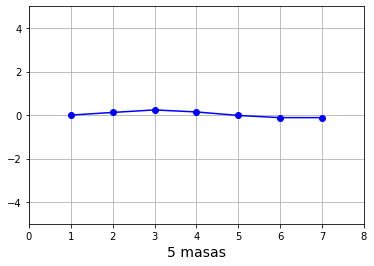

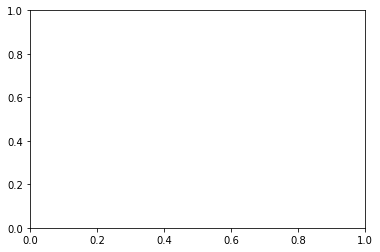

In [ ]:
rc("animation",html="html5");
fig,ax=plt.subplots()
linea,=ax.plot([],[],color="b",label="Movimiento",linestyle="-",marker="o")
c=1
L=1
tau=0.05
N=7

fig.ax=plt.subplots()
ax.set_xlabel("5 masas",fontsize=14)
ax.set_xlim([0,8])
ax.set_ylim([-5,5])
ax.grid()

w11,A11=np.linalg.eig(mat11)           #w son los autovalores, y A son los autovectores asociados
b=np.array([0.2*2/(3),0.2*3/(4),3/8,0.3,0.2,0.1,0]).T          #phi(t=0) de cada masa
#La fase la tomo como psi(n)=0, ya que  sale de la condición inicial de la velocidad.
def graficar(t):
  psi=[]
  tiempo=np.linspace(0,10,1000)
  n=np.linspace(1,7,7)
  masas=range(1,7)
  modos=range(1,7)
  psi.append(0)
  for m in masas:
    var=0
    for p in modos:
      var=var+b[p]*np.cos(p*np.pi*m/5)*np.cos(w11[p]*tiempo[t])
      psi.append(var)
    linea.set_data(n,psi)
    return(linea,)
anim=animation.FuncAnimation(fig,graficar,frames=100,interval=200)
anim